<a href="https://colab.research.google.com/github/fmardero/311JobGym/blob/main/DS_using_Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data science using the Titanic dataset

<img height='300px' src='https://www.focus.it/images/2022/04/06/illustrazione-titanic_1020x680.jpg' />

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**Using passenger data, what sorts of people were more likely to survive? Why?**

More info about the dataset [here](https://www.kaggle.com/competitions/titanic/dataps://).

## Data download

In [ ]:
!pwd

/content


In [ ]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2022-06-06 13:27:15--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2022-06-06 13:27:15 (3.95 MB/s) - ‘titanic.csv’ saved [60302/60302]



## Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**First considerations**

*   Which variables require more understanding about their meaning/content?
*   Which variables appear to be useless?
*   Can there be interesting correlations between different variables?
*   Are there any variables in which we might encounter data quality issues?




### Variables selection

In [ ]:
df.drop(columns=['PassengerId', 'Ticket'], inplace=True)

### Missing values

In [ ]:
df.isnull().sum() / len(df)

Survived    0.000000
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.198653
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Cabin       0.771044
Embarked    0.002245
dtype: float64

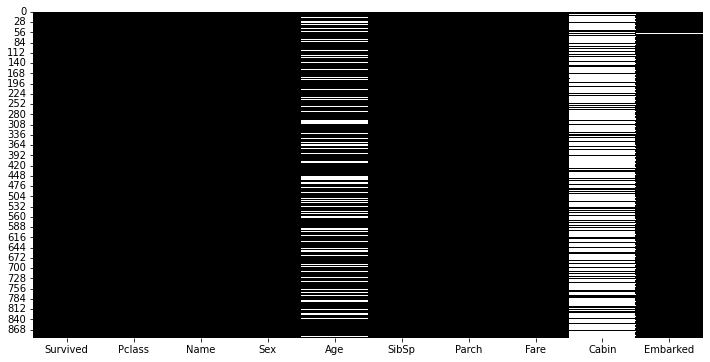

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df.isnull(), annot=False, cmap=['k', 'w'], cbar=False)
plt.show()

### Plots

#### Univariate analysis

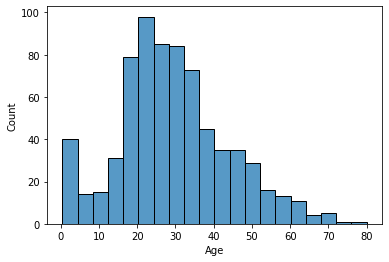

In [ ]:
sns.histplot(data=df, x='Age')

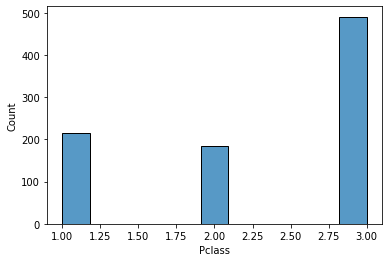

In [ ]:
sns.histplot(data=df, x='Pclass')

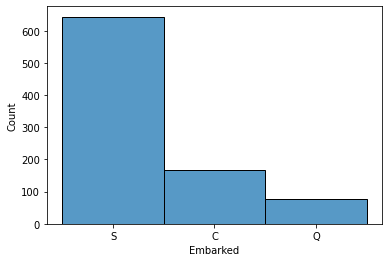

In [ ]:
sns.histplot(data=df, x='Embarked')

#### Multivariate analysis

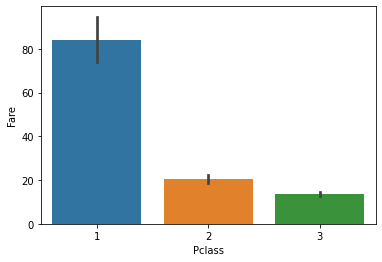

In [ ]:
sns.barplot(x=df.Pclass, y=df.Fare, estimator=np.mean)

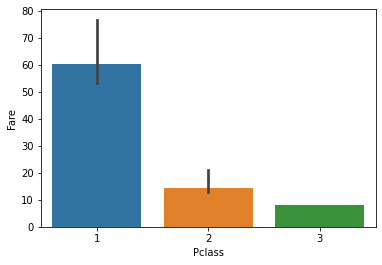

In [ ]:
sns.barplot(x=df.Pclass, y=df.Fare, estimator=np.median)

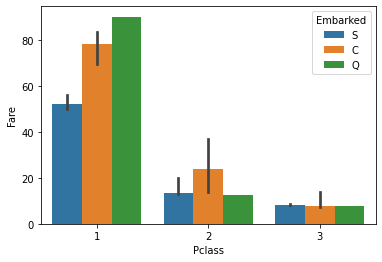

In [ ]:
sns.barplot(x=df.Pclass, y=df.Fare, hue=df.Embarked, estimator=np.median)

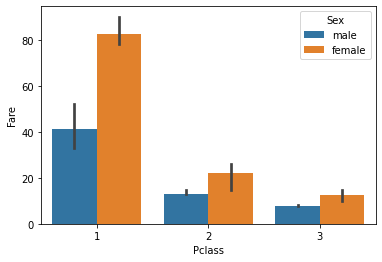

In [ ]:
sns.barplot(x=df.Pclass, y=df.Fare, hue=df.Sex, estimator=np.median)

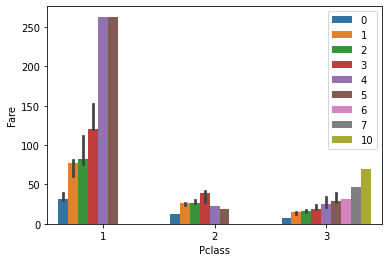

In [ ]:
sns.barplot(x=df.Pclass, y=df.Fare, hue=df.SibSp+df.Parch, estimator=np.median)

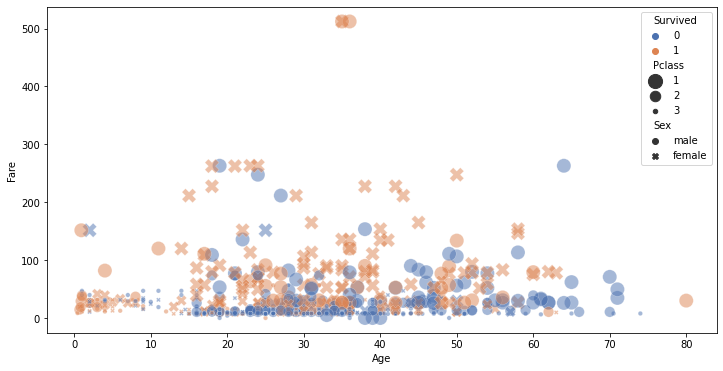

In [ ]:
# How to represent 5 variables in one 2D graph
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df,
    x='Age',
    y='Fare',
    hue='Survived',
    palette='deep',
    size='Pclass',
    sizes=(200, 20),
    alpha=0.5,
    style='Sex'
)
plt.show()